# Homework 3

You will work on a crowdfunding data. If you don't know much about crowdfunding, please take a look at the following wikipedia page: https://en.wikipedia.org/wiki/Crowdfunding. Your goal is to predict which projects are successfully funded or not. For the definition of each variable, refer to 'data_dictionary.xlsx'. You can also refer to 'crowdfunding_variables.' 

## Import Libraries

**Import a few libraries you think you'll need.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

## Get the Data
**Read in the original_file.csv file and set it to a data frame called crowdfunding.**

In [5]:
crowdfunding = pd.read_csv('original_file.csv')

**Check the head of crowdfunding**

In [6]:
crowdfunding.head()

,organizer_id,city,state,project_id,goal,balance,pct_raised,funding_started_at,facebook_url,imdb_url,...,funding_successful_at,fb_total_likes,all_or_nothing,category,total_pageviews,unique_visitors,visits_to_crt_edt_pgs,partner_id,prior_campaigns,num_perks
0,109,Milwaukee,WI,104,2000,1850,0.9250,11/23/08 12:23,0,0,...,NaN,2,0,9.0,0,0,NaN,NaN,1,4
1,120,Woodside,CA,117,20000,23012,1.1506,3/7/08 22:23,1,0,...,3/19/08 20:42,79,0,9.0,0,0,NaN,NaN,1,4
2,923,SeaSide,CA,250,500,500,1.0000,3/13/08 16:48,0,0,...,3/16/08 12:59,2,0,9.0,0,0,NaN,NaN,2,7
3,970,Oakland,CA,271,5000,430,0.0860,11/24/08 12:29,0,0,...,NaN,2,0,9.0,0,0,NaN,NaN,1,3
4,1051,Baltimore,MD,291,500,500,1.0000,4/8/08 7:58,0,0,...,4/19/08 8:12,2,0,9.0,0,0,NaN,NaN,1,0


**Use info and describe()**

In [7]:
crowdfunding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14361 entries, 0 to 14360
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   organizer_id           14361 non-null  int64  
 1   city                   14193 non-null  object 
 2   state                  14111 non-null  object 
 3   project_id             14071 non-null  object 
 4   goal                   14361 non-null  int64  
 5   balance                14361 non-null  int64  
 6   pct_raised             14361 non-null  float64
 7   funding_started_at     14360 non-null  object 
 8   facebook_url           14361 non-null  int64  
 9   imdb_url               14361 non-null  int64  
 10  twitter_url            14361 non-null  int64  
 11  youtube_url            14361 non-null  int64  
 12  website_url            14361 non-null  int64  
 13  featured               14361 non-null  int64  
 14  enable_drcc            14186 non-null  float64
 15  en

In [8]:
crowdfunding.describe()

,organizer_id,goal,balance,pct_raised,facebook_url,imdb_url,twitter_url,youtube_url,website_url,featured,...,enable_payp,fb_total_likes,all_or_nothing,category,total_pageviews,unique_visitors,visits_to_crt_edt_pgs,partner_id,prior_campaigns,num_perks
count,14361.000000,1.436100e+04,14361.000000,14361.000000,14361.000000,14361.000000,14361.000000,14361.000000,14361.000000,14361.000000,...,14361.000000,14361.000000,14361.000000,14357.000000,1.436100e+04,1.436100e+04,8283.000000,877.000000,14361.000000,14361.000000
mean,365311.353736,1.412555e+04,2519.629065,0.519100,0.585892,0.074159,0.360838,0.284729,0.515284,0.070051,...,0.666040,388.795209,0.013091,13.454204,2.000954e+03,7.781747e+02,12.390921,2.875713,0.165727,4.511524
std,263377.172844,1.071998e+05,8637.282927,1.335766,0.492584,0.262039,0.480260,0.451301,0.499784,0.255242,...,0.471642,282.199478,0.113669,5.742726,6.261709e+04,1.652782e+04,5.361100,6.212876,0.663386,3.909174
min,101.000000,5.000000e+02,250.000000,0.000050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,4.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,0.000000
25%,138889.000000,2.190000e+03,560.000000,0.108000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,152.000000,0.000000,9.000000,0.000000e+00,0.000000e+00,7.000000,1.000000,0.000000,1.000000
50%,324340.000000,5.000000e+03,1122.000000,0.310300,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,351.000000,0.000000,11.000000,3.280000e+02,1.480000e+02,15.000000,1.000000,0.000000,4.000000
75%,558969.000000,1.000000e+04,2540.000000,0.864000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,616.000000,0.000000,18.000000,1.102000e+03,4.520000e+02,15.000000,1.000000,0.000000,7.000000
max,988800.000000,7.000000e+06,703833.000000,140.767000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,921.000000,1.000000,69.000000,7.154381e+06,1.775496e+06,31.000000,42.000000,18.000000,129.000000


**Discuss important aspects of your crowdfunding data. This is an open-ended question.**

In [9]:
• It is a very effective and quick way to raise money with not no upfront fees.

• The pitching business or project vi online platforms could be an important form of marketing and advertisement result in the attention of media.

• We can get feedback and guidance from experts more often.

• It is very easy to track progress while using crowdfunding.

• The investor could become the most loyal customers via the financing process.

SyntaxError: invalid character '•' (U+2022) (Temp/ipykernel_6420/1426754220.py, line 1)

## Pre-Processing Steps

The main reasoning for this step is to look at the variables which can be controlled by the user while setting up the project.<br>
**Setting the scope: we are only considering projects which have generated at least 250. Use balance variable.** 

In [12]:
crowdfunding=crowdfunding[crowdfunding['balance'] >= 250]

**To make things easier, drop the following three variables that have lots of missing values: 'funding_successful_at', 'visits_to_crt_edt_pgs', 'partner_id'.**

In [13]:
crowdfunding.drop(['funding_successful_at','visits_to_crt_edt_pgs','partner_id'],axis=1)

,organizer_id,city,state,project_id,goal,balance,pct_raised,funding_started_at,facebook_url,imdb_url,...,enable_drcc,enable_payp,funding_ends_at,fb_total_likes,all_or_nothing,category,total_pageviews,unique_visitors,prior_campaigns,num_perks
0,109,Milwaukee,WI,104,2000,1850,0.925000,11/23/08 12:23,0,0,...,1.0,0,7/1/10 23:59,2,0,9.0,0,0,1,4
1,120,Woodside,CA,117,20000,23012,1.150600,3/7/08 22:23,1,0,...,1.0,1,6/30/10 23:59,79,0,9.0,0,0,1,4
2,923,SeaSide,CA,250,500,500,1.000000,3/13/08 16:48,0,0,...,1.0,0,6/30/10 23:59,2,0,9.0,0,0,2,7
3,970,Oakland,CA,271,5000,430,0.086000,11/24/08 12:29,0,0,...,1.0,0,6/30/10 23:59,2,0,9.0,0,0,1,3
4,1051,Baltimore,MD,291,500,500,1.000000,4/8/08 7:58,0,0,...,1.0,0,6/30/10 23:59,2,0,9.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14356,987113,Boise,ID,197616,12000,275,0.022917,8/6/12 16:13,1,0,...,1.0,1,9/3/12 23:59,204,0,26.0,0,0,0,0
14357,945889,Tucson,AZ,197737,1500,250,0.166667,8/6/12 14:10,1,0,...,1.0,0,9/5/12 23:59,3,0,18.0,34,13,0,0
14358,988525,Ventura,CA,197860,5250,750,0.142857,8/6/12 16:21,0,0,...,1.0,0,8/20/12 23:59,2,0,21.0,0,0,1,1
14359,988800,Tucson,AZ,197904,3000,326,0.108667,8/6/12 20:45,1,0,...,0.0,1,8/30/12 23:59,2,0,19.0,0,0,0,2


**Drop all the projects with any missing values.** 

In [14]:
crowdfunding.dropna()

,organizer_id,city,state,project_id,goal,balance,pct_raised,funding_started_at,facebook_url,imdb_url,...,funding_successful_at,fb_total_likes,all_or_nothing,category,total_pageviews,unique_visitors,visits_to_crt_edt_pgs,partner_id,prior_campaigns,num_perks
672,1258,Greensboro,NC,7732,2500,3142,1.25680,8/25/10 11:48,1,1,...,9/2/10 11:08,3,0,9.0,0,0,1.0,1.0,0,3
1218,63484,Los Angeles,CA,14655,7500,10893,1.45240,1/4/11 18:26,1,0,...,2/10/11 22:46,774,0,13.0,0,0,4.0,1.0,0,7
1364,25155,New York,NY,16250,25000,25415,1.01660,2/16/11 11:24,1,0,...,4/16/11 11:08,264,0,9.0,0,0,1.0,1.0,0,4
1408,75547,Los Angeles,CA,16699,6000,7850,1.30833,9/15/11 12:12,0,0,...,9/21/11 11:14,495,0,9.0,1275,1107,1.0,2.0,0,3
1489,80205,Santa Fe,NM,17496,15000,15875,1.05833,7/13/11 8:52,0,0,...,9/30/11 4:29,222,0,9.0,2106,1192,5.0,4.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11984,707658,Chicago,IL,123218,4000,4005,1.00125,6/21/12 11:09,1,0,...,7/7/12 23:43,222,0,9.0,2221,325,15.0,34.0,0,8
12106,6620,New York,NY,124958,1000,1000,1.00000,6/26/12 12:59,1,0,...,7/4/12 21:01,238,0,13.0,86,21,23.0,1.0,0,6
13192,114163,new york,NY,162362,500,940,1.88000,7/26/12 14:03,1,0,...,7/28/12 12:24,627,0,4.0,187,140,31.0,1.0,0,2
13364,822003,Lenox,MA,166423,2589,3810,1.47161,7/13/12 13:01,1,0,...,8/3/12 21:10,579,0,11.0,745,298,15.0,1.0,0,6


**How many campaigns have you ended up having?** 

In [15]:
crowdfunding.info

<bound method DataFrame.info of        organizer_id          city state project_id   goal  balance  \
0               109     Milwaukee    WI        104   2000     1850   
1               120      Woodside    CA        117  20000    23012   
2               923       SeaSide    CA        250    500      500   
3               970       Oakland    CA        271   5000      430   
4              1051     Baltimore    MD        291    500      500   
...             ...           ...   ...        ...    ...      ...   
14356        987113         Boise    ID     197616  12000      275   
14357        945889        Tucson    AZ     197737   1500      250   
14358        988525       Ventura    CA     197860   5250      750   
14359        988800        Tucson    AZ     197904   3000      326   
14360        963988  Santa Monica    CA     197956   1200      445   

       pct_raised funding_started_at  facebook_url  imdb_url  ...  \
0        0.925000     11/23/08 12:23             0        

## Feature Engineering

First convert the following variables to date/time variables:<br>
* funding_started_at
* funding_ends_at

**Use a pandas function, 'to_datetime', to do it.** 

In [16]:
 crowdfunding['funding_started_at'] = pd.to_datetime(crowdfunding['funding_started_at'])
 crowdfunding['funding_ends_at'] = pd.to_datetime(crowdfunding['funding_ends_at'])

**Next create Day of Week (DOW) and Month of Year (MOY) variables by using the variable transformed from 'funding_started_at'.** <br>

In [17]:
crowdfunding['day_of_week'] = crowdfunding['funding_started_at'].dt.day_name()
crowdfunding['month_of_year'] = crowdfunding['funding_started_at'].dt.month_name()

**Check out that you successfully transformed the two variables and created DOW and MOY variables.** 

In [18]:
crowdfunding['day_of_week']

0          Sunday
1          Friday
2        Thursday
3          Monday
4         Tuesday
           ...   
14356      Monday
14357      Monday
14358      Monday
14359      Monday
14360      Monday
Name: day_of_week, Length: 14361, dtype: object

In [19]:
crowdfunding['month_of_year']

0        November
1           March
2           March
3        November
4           April
           ...   
14356      August
14357      August
14358      August
14359      August
14360      August
Name: month_of_year, Length: 14361, dtype: object

### Campaign Duration & Success Measures

• duration: the organizer specified fundraising duration in days<br>
• win: a binary indicator of whether the campaign achieved its fundraising goal.<br>
• calculate the natural logarithm for goal and duration

**Construct the following variable: duration. Duration is the time period in days that the organizer specified. In other words, it is the difference in days between the date the funding started and the date it ended.**

In [20]:
crowdfunding['duration'] = crowdfunding['funding_ends_at'] - crowdfunding['funding_started_at']


**Construct a binary indicator of success, win. 'win' is a binary indicator of whether the campaign achieved its fundraising goal.**<br>
**This will be our target variable.**

### log-transform variables


**We will log-transform the two variables, goal and duration. First check out that they are skewed toward the right tail by drawing histograms.**

<AxesSubplot:xlabel='duration'>

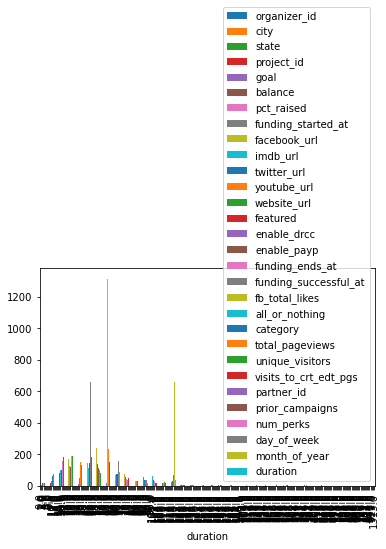

In [21]:
crowdfunding.groupby(crowdfunding['duration'].dt.days).count().plot(kind="bar")

(array([1.434e+04, 1.500e+01, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([5.00000e+02, 7.00450e+05, 1.40040e+06, 2.10035e+06, 2.80030e+06,
        3.50025e+06, 4.20020e+06, 4.90015e+06, 5.60010e+06, 6.30005e+06,
        7.00000e+06]),
 <BarContainer object of 10 artists>)

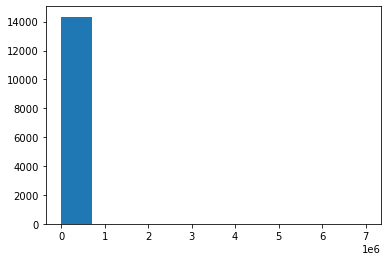

In [22]:
plt.hist(crowdfunding.goal)

**Import math package for log-transformation.**

In [23]:
import math
np.log(crowdfunding['duration'].dt.days)

C:\Users\otse\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0        6.371612
1        6.739337
2        6.732211
3        6.368187
4        6.700731
           ...   
14356    3.332205
14357    3.401197
14358    2.639057
14359    3.178054
14360    2.833213
Name: duration, Length: 14361, dtype: float64

**Calculate the natural logarithm for goal and duration.**

In [24]:
np.log(crowdfunding['goal'])

0        7.600902
1        9.903488
2        6.214608
3        8.517193
4        6.214608
           ...   
14356    9.392662
14357    7.313220
14358    8.565983
14359    8.006368
14360    7.090077
Name: goal, Length: 14361, dtype: float64

## EDA

We will explore our data a bit. 

**What are top 2 states that have most projects originated? Draw a plot to answer this question.** 

<AxesSubplot:xlabel='state', ylabel='count'>

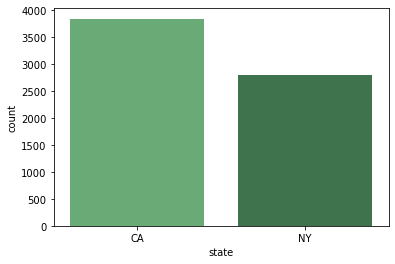

In [25]:
sns.countplot(x='state',data=crowdfunding,  palette="Greens_d",
              order=crowdfunding.state.value_counts().iloc[:2].index)

**Which months have the most projects originated? Which months have the highest success rate? Draw a plot to answer them. You use the month a campain (i.e., funding) started.** 

<AxesSubplot:xlabel='month_of_year', ylabel='count'>

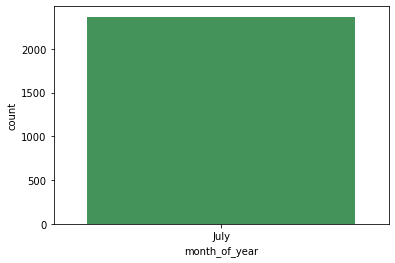

In [26]:
sns.countplot(x='month_of_year',data=crowdfunding,  palette="Greens_d",
              order=crowdfunding.month_of_year.value_counts().iloc[:1].index)

In [27]:
crowdfunding = crowdfunding.groupby('month_of_year')['success_rate'].mean().mul(100).rsub(100).reset_index(name='%failed')

KeyError: 'Column not found: success_rate'

### Converting categorical features

**We will generate dummy variables with day of week variable. Use 'funding_started_at_DOW' variable. Why cannot we use the current variable? What is a problem?**

It is a nominal variable. This means that values do not have a specific order. We cannot say that 1 is greater than 12. Thus, we can't use it directly in a model. Instead, we should convert it to dummy variables.  

**Now generate dummy variables from the DOW variable.** 

In [28]:
train=pd.get_dummies(data=crowdfunding, columns=['day_of_week'], drop_first=True)

**Do the same thing to convert another categorical variable, 'funding_started_at_MOY', to several dummies. How many dummies should we generate and use in the following models?** 

In [29]:
crowdfunding.head

<bound method NDFrame.head of        organizer_id          city state project_id   goal  balance  \
0               109     Milwaukee    WI        104   2000     1850   
1               120      Woodside    CA        117  20000    23012   
2               923       SeaSide    CA        250    500      500   
3               970       Oakland    CA        271   5000      430   
4              1051     Baltimore    MD        291    500      500   
...             ...           ...   ...        ...    ...      ...   
14356        987113         Boise    ID     197616  12000      275   
14357        945889        Tucson    AZ     197737   1500      250   
14358        988525       Ventura    CA     197860   5250      750   
14359        988800        Tucson    AZ     197904   3000      326   
14360        963988  Santa Monica    CA     197956   1200      445   

       pct_raised  funding_started_at  facebook_url  imdb_url  ...  category  \
0        0.925000 2008-11-23 12:23:00            

**You finished cleaning your data and generating necessary variables. Please check out your final data again by using head(), info(), and describe().** 

In [30]:
crowdfunding.head()

,organizer_id,city,state,project_id,goal,balance,pct_raised,funding_started_at,facebook_url,imdb_url,...,category,total_pageviews,unique_visitors,visits_to_crt_edt_pgs,partner_id,prior_campaigns,num_perks,day_of_week,month_of_year,duration
0,109,Milwaukee,WI,104,2000,1850,0.9250,2008-11-23 12:23:00,0,0,...,9.0,0,0,NaN,NaN,1,4,Sunday,November,585 days 11:36:00
1,120,Woodside,CA,117,20000,23012,1.1506,2008-03-07 22:23:00,1,0,...,9.0,0,0,NaN,NaN,1,4,Friday,March,845 days 01:36:00
2,923,SeaSide,CA,250,500,500,1.0000,2008-03-13 16:48:00,0,0,...,9.0,0,0,NaN,NaN,2,7,Thursday,March,839 days 07:11:00
3,970,Oakland,CA,271,5000,430,0.0860,2008-11-24 12:29:00,0,0,...,9.0,0,0,NaN,NaN,1,3,Monday,November,583 days 11:30:00
4,1051,Baltimore,MD,291,500,500,1.0000,2008-04-08 07:58:00,0,0,...,9.0,0,0,NaN,NaN,1,0,Tuesday,April,813 days 16:01:00


In [31]:
crowdfunding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14361 entries, 0 to 14360
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   organizer_id           14361 non-null  int64          
 1   city                   14193 non-null  object         
 2   state                  14111 non-null  object         
 3   project_id             14071 non-null  object         
 4   goal                   14361 non-null  int64          
 5   balance                14361 non-null  int64          
 6   pct_raised             14361 non-null  float64        
 7   funding_started_at     14360 non-null  datetime64[ns] 
 8   facebook_url           14361 non-null  int64          
 9   imdb_url               14361 non-null  int64          
 10  twitter_url            14361 non-null  int64          
 11  youtube_url            14361 non-null  int64          
 12  website_url            14361 non-null  int64  

In [32]:
crowdfunding.describe()

,organizer_id,goal,balance,pct_raised,facebook_url,imdb_url,twitter_url,youtube_url,website_url,featured,...,fb_total_likes,all_or_nothing,category,total_pageviews,unique_visitors,visits_to_crt_edt_pgs,partner_id,prior_campaigns,num_perks,duration
count,14361.000000,1.436100e+04,14361.000000,14361.000000,14361.000000,14361.000000,14361.000000,14361.000000,14361.000000,14361.000000,...,14361.000000,14361.000000,14357.000000,1.436100e+04,1.436100e+04,8283.000000,877.000000,14361.000000,14361.000000,14356
mean,365311.353736,1.412555e+04,2519.629065,0.519100,0.585892,0.074159,0.360838,0.284729,0.515284,0.070051,...,388.795209,0.013091,13.454204,2.000954e+03,7.781747e+02,12.390921,2.875713,0.165727,4.511524,56 days 05:59:31.584006687
std,263377.172844,1.071998e+05,8637.282927,1.335766,0.492584,0.262039,0.480260,0.451301,0.499784,0.255242,...,282.199478,0.113669,5.742726,6.261709e+04,1.652782e+04,5.361100,6.212876,0.663386,3.909174,49 days 04:54:32.325910449
min,101.000000,5.000000e+02,250.000000,0.000050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,4.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0 days 17:58:00
25%,138889.000000,2.190000e+03,560.000000,0.108000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,152.000000,0.000000,9.000000,0.000000e+00,0.000000e+00,7.000000,1.000000,0.000000,1.000000,30 days 16:57:00
50%,324340.000000,5.000000e+03,1122.000000,0.310300,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,351.000000,0.000000,11.000000,3.280000e+02,1.480000e+02,15.000000,1.000000,0.000000,4.000000,47 days 07:51:30
75%,558969.000000,1.000000e+04,2540.000000,0.864000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,616.000000,0.000000,18.000000,1.102000e+03,4.520000e+02,15.000000,1.000000,0.000000,7.000000,64 days 08:04:00
max,988800.000000,7.000000e+06,703833.000000,140.767000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,921.000000,1.000000,69.000000,7.154381e+06,1.775496e+06,31.000000,42.000000,18.000000,129.000000,1313 days 11:57:00


**Examine the summary statistics of 'win'. What is the rate of successful projects?**

**Now let's create the model data for the logistic regression model. Suppose that you are using the following set of variables as predictors:** ['ln_goal','ln_duration','facebook_url', 'imdb_url', 'twitter_url', 'youtube_url', 'website_url', 'featured', 'enable_drcc', 'enable_payp','all_or_nothing','funding_started_at_DOW_1','funding_started_at_DOW_2','funding_started_at_DOW_3','funding_started_at_DOW_4','funding_started_at_DOW_5','funding_started_at_DOW_6', 'funding_started_at_MOY_2', 'funding_started_at_MOY_3', 'funding_started_at_MOY_4', 'funding_started_at_MOY_5', 'funding_started_at_MOY_6', 'funding_started_at_MOY_7', 'funding_started_at_MOY_8', 'funding_started_at_MOY_9', 'funding_started_at_MOY_10', 'funding_started_at_MOY_11', 'funding_started_at_MOY_12']

In [37]:
x= crowdfunding['goal']
y=crowdfunding['balance']

KeyError: ('goal', 'face', 'facebook_url', 'imdb_url', 'twitter_url', 'youtube_url', 'website_url', 'featured', 'enable_drcc', 'enable_payp', 'all_or_nothing')

The focus in predictive analysis should be on those variables that are under the control of a campaign organizer. In theory, you should thus not include variables that a campaign organizer cannot control in your preditive model. **Which variable(s), if any, cannot be controlled by a campaign organizer?**

Great! Our data is ready for our model!

## Building a Logistic Regression model

**Let's start by splitting our data into a training set and test set. We set 'test_size' to 0.3 and 'random_state' to 101.** 

### Train Test Split

In [ ]:
X=X=train_final.drop(['win','balance'], axis=1)
Y=crowdfunding['win']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

NameError: name 'X' is not defined

### Training and predicting

**Import 'LogisticRegression' function and follow the standard steps in the lecture.**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

NameError: name 'LogisticRegression' is not defined

In [31]:
predictions = logmodel.predict(X_test)
probs = logmodel.predict_proba(X_test)

NameError: name 'logmodel' is not defined

### Evaluation

**You can get the confusion matrix.**

In [89]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

NameError: name 'y_test' is not defined

**You can check precision,recall,f1-score using classification report!**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

**Describe the results briefly. In particular, discuss the precision for class 1.**

**You can finally get the ROC curve and AUC score.** 

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, probs1[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**How can we improve the performance? Can we add more variables? What else can we do? This is an open-ended question.** 

In [ ]:
Add interaction terms to model how two or more independent variables together impact the target variable

Add polynomial terms to model the nonlinear relationship between an independent variable and the target variable

Add spines to approximate piecewise linear models

Fit isotonic regression to remove any assumption of the target function form
    
Fit non-parametric models, such as MARS
